# Sebastián Alvarado Pérez

### Paqueterias necesarias

In [8]:
using LinearAlgebra
using Plots
using LaTeXStrings

### Funciones

In [448]:
# an(n,sigm,gam)=(exp(-n^2/(4*sigm^2))/(4*sqrt(2*pi*sigm^2)))*cos(gam/2)
# bn(n,sigm,gam,phi)=(exp(-n^2/(4*sigm^2))/(4*sqrt(2*pi*sigm^2)))*sin(gam/2)*exp(phi*im)
# bn(n,sigm,gam)=(exp(-n^2/(4*sigm^2))/(4*sqrt(2*pi*sigm^2)))*sin(gam/2)

fnt = Plots.font("sans-serif", 15) # Para gráficar loas labels

#coeficientes iniciales

an(n,sigm,gam)=sqrt(exp(-n^2/(2*sigm^2))/(sqrt(2*pi*sigm^2)))*cos(gam/2)    
bn(n,sigm,gam,phi)=sqrt(exp(-n^2/(2*sigm^2))/(sqrt(2*pi*sigm^2)))*sin(gam/2)*exp(phi*im)
bn(n,sigm,gam)=sqrt(exp(-n^2/(2*sigm^2))/(sqrt(2*pi*sigm^2)))*sin(gam/2)

bn (generic function with 2 methods)

In [449]:
function QuanWal_1D_Gauss(n::Int64,H::Matrix{Float64},sigm,gam,phi=0,F=5)  


    kb=[[1,0],[0,1]]     #BASE USUAL es un vector de vectores que contenga cada uno |+> y |->

    #Ejemplo de regla de correspondencia 
    # -4-->1
    # -3-->2
    # -2-->3
    # -1-->4
    # 0-->5
    # 1-->6
    # 2-->7
    # 3-->8
    # 4-->9
    ###########################################
    ##########CONDICIONES INICIALES#############
    P=sigm*F*2+1 # Número impar o número de estados en la linea se usa que es una distr gaussianda para colocar los siginificativos
                 # es decir se usa la sigma para calcular el núméro de espacios

    Pcen=Int64(((P-1)/2)+1)  #Buscamos el centro del arreglo en indices si el impar es 9 el centro es el 5
    #println(Pcen)
    init=-(Pcen-1)          # ahora buscamos el número que corresponde a la posición de la teoria si esn 9 entoces es -4
    #println(init)

    A0=Array{Vector{ComplexF64}}(undef, P) #Numero de qbits iniciales
    @inbounds for i=1:P ## Llenamos los estados con los qbits iniciales con an y bn
        #println(i,"-->",init+(i-1))
        a=an(init+(i-1),sigm,gam)          # usamos la condicion inicial de un estado de un gaussian walker
        b=bn(init+(i-1),sigm,gam,phi)          # usamos la condicion inicial de un estado de un gaussian walker
        A0[i]=[a,b] #### Empieza con quiralidad derecha
    end;
    ##########################################
    ##########################################


    ############Rellenado de espacios##################
    #######Condicion inicial con final################

    PP=P+(2*n) # agregar nuevos lugares
    PPcen=Int64(((PP-1)/2)+1) #Lugar del centro del nuevo espacio que se construye

    init2=-(PPcen-1)   # buscamos el número que corresponde en la "frotnera" inicial si es 9-->-4

    A=Array{Vector{ComplexF64}}(undef, PP) #Numero de qbits Finales
    B=Array{Vector{ComplexF64}}(undef, PP)

    @inbounds for i=1:PP #rellenamos con ceros
        A[i]=[0,0]
        B[i]=[0,0]
    end;

    re0=PPcen-Int64((P-1)/2) # del centro restamos P-1/2 unidades para rellenar con los A0
     @inbounds for i=re0:re0+P-1     #Rellenamos desde el indice re0 hasta re0+P-1
         A[i]=A0[i-re0+1]          
     end;
    ###############################################
    ##############################################



    ##########Dinámica#####################
    for k=0:n-1 ###el número de veces que va iterar
        if k%2==0
            for i=re0-k:(re0+P-1)+k 
                if kb[1]*transpose(kb[1])*(H*A[i]) != [0+0im,0+0im] #Si la proyección |L><L|H|phi> es diferente de 0
                    B[i+1]=B[i+1]+kb[1]*transpose(kb[1])*(H*A[i])  #entonces en B escribira el nuevo qbit H|phi> en la posición n-1
                end                                                 #Sumandola a la anterior que estaba allí
                if kb[2]*transpose(kb[2])*(H*A[i]) != [0+0im,0+0im] #Si la proyección |R><R|H|phi> es diferente de 0
                    B[i-1]=B[i-1]+kb[2]*transpose(kb[2])*(H*A[i])   #entonces en B escribira el nuevo qbit H|phi> en la posición n+1
                end                                                  #Sumandola a la anterior que estaba allí
                for j=re0-k:(re0+P-1)+k 
                    A[i]=[0,0]                                     #Por último se reescribe A para que quede en ceros [0,0]
                end

            end
        else
            for i=re0-k:(re0+P-1)+k
                if kb[1]*transpose(kb[1])*(H*B[i]) != [0+0im,0+0im]
                    A[i+1]=A[i+1]+kb[1]*transpose(kb[1])*(H*B[i])
                end
                if kb[2]*transpose(kb[2])*(H*B[i]) != [0+0im,0+0im]
                    A[i-1]=A[i-1]+kb[2]*transpose(kb[2])*(H*B[i])
                end
                for j=re0-k:(re0+P-1)+k
                    B[i]=[0,0]
                end    
            end
        end
    end
    if n%2==0
        G=A
    else
        G=B
    end
    return G
    ###################################
end

QuanWal_1D_Gauss (generic function with 3 methods)

In [794]:
H=1/sqrt(2)*[1 1; 1 -1];

sigm=5
gam=π*(1/2)
phi=π*(1/2)
n=50 # Pasos
F=5

G=QuanWal_1D_Gauss(n,H,sigm,gam,phi,F);
Init=Int64(((length(G)-1)/2)+1)
Init=(Init-1)


Space=-Init:1:Init
Proba=norm.(G).^2
#######33
#########3
########3
SpaceP=zeros(0)
ProbaP=zeros(0)


for i=1:length(Space)
    if Proba[i]!=0.0
        append!(ProbaP, Proba[i])
        append!(SpaceP, Space[i])
    end
end
Numero_de_datos=length(SpaceP)


151

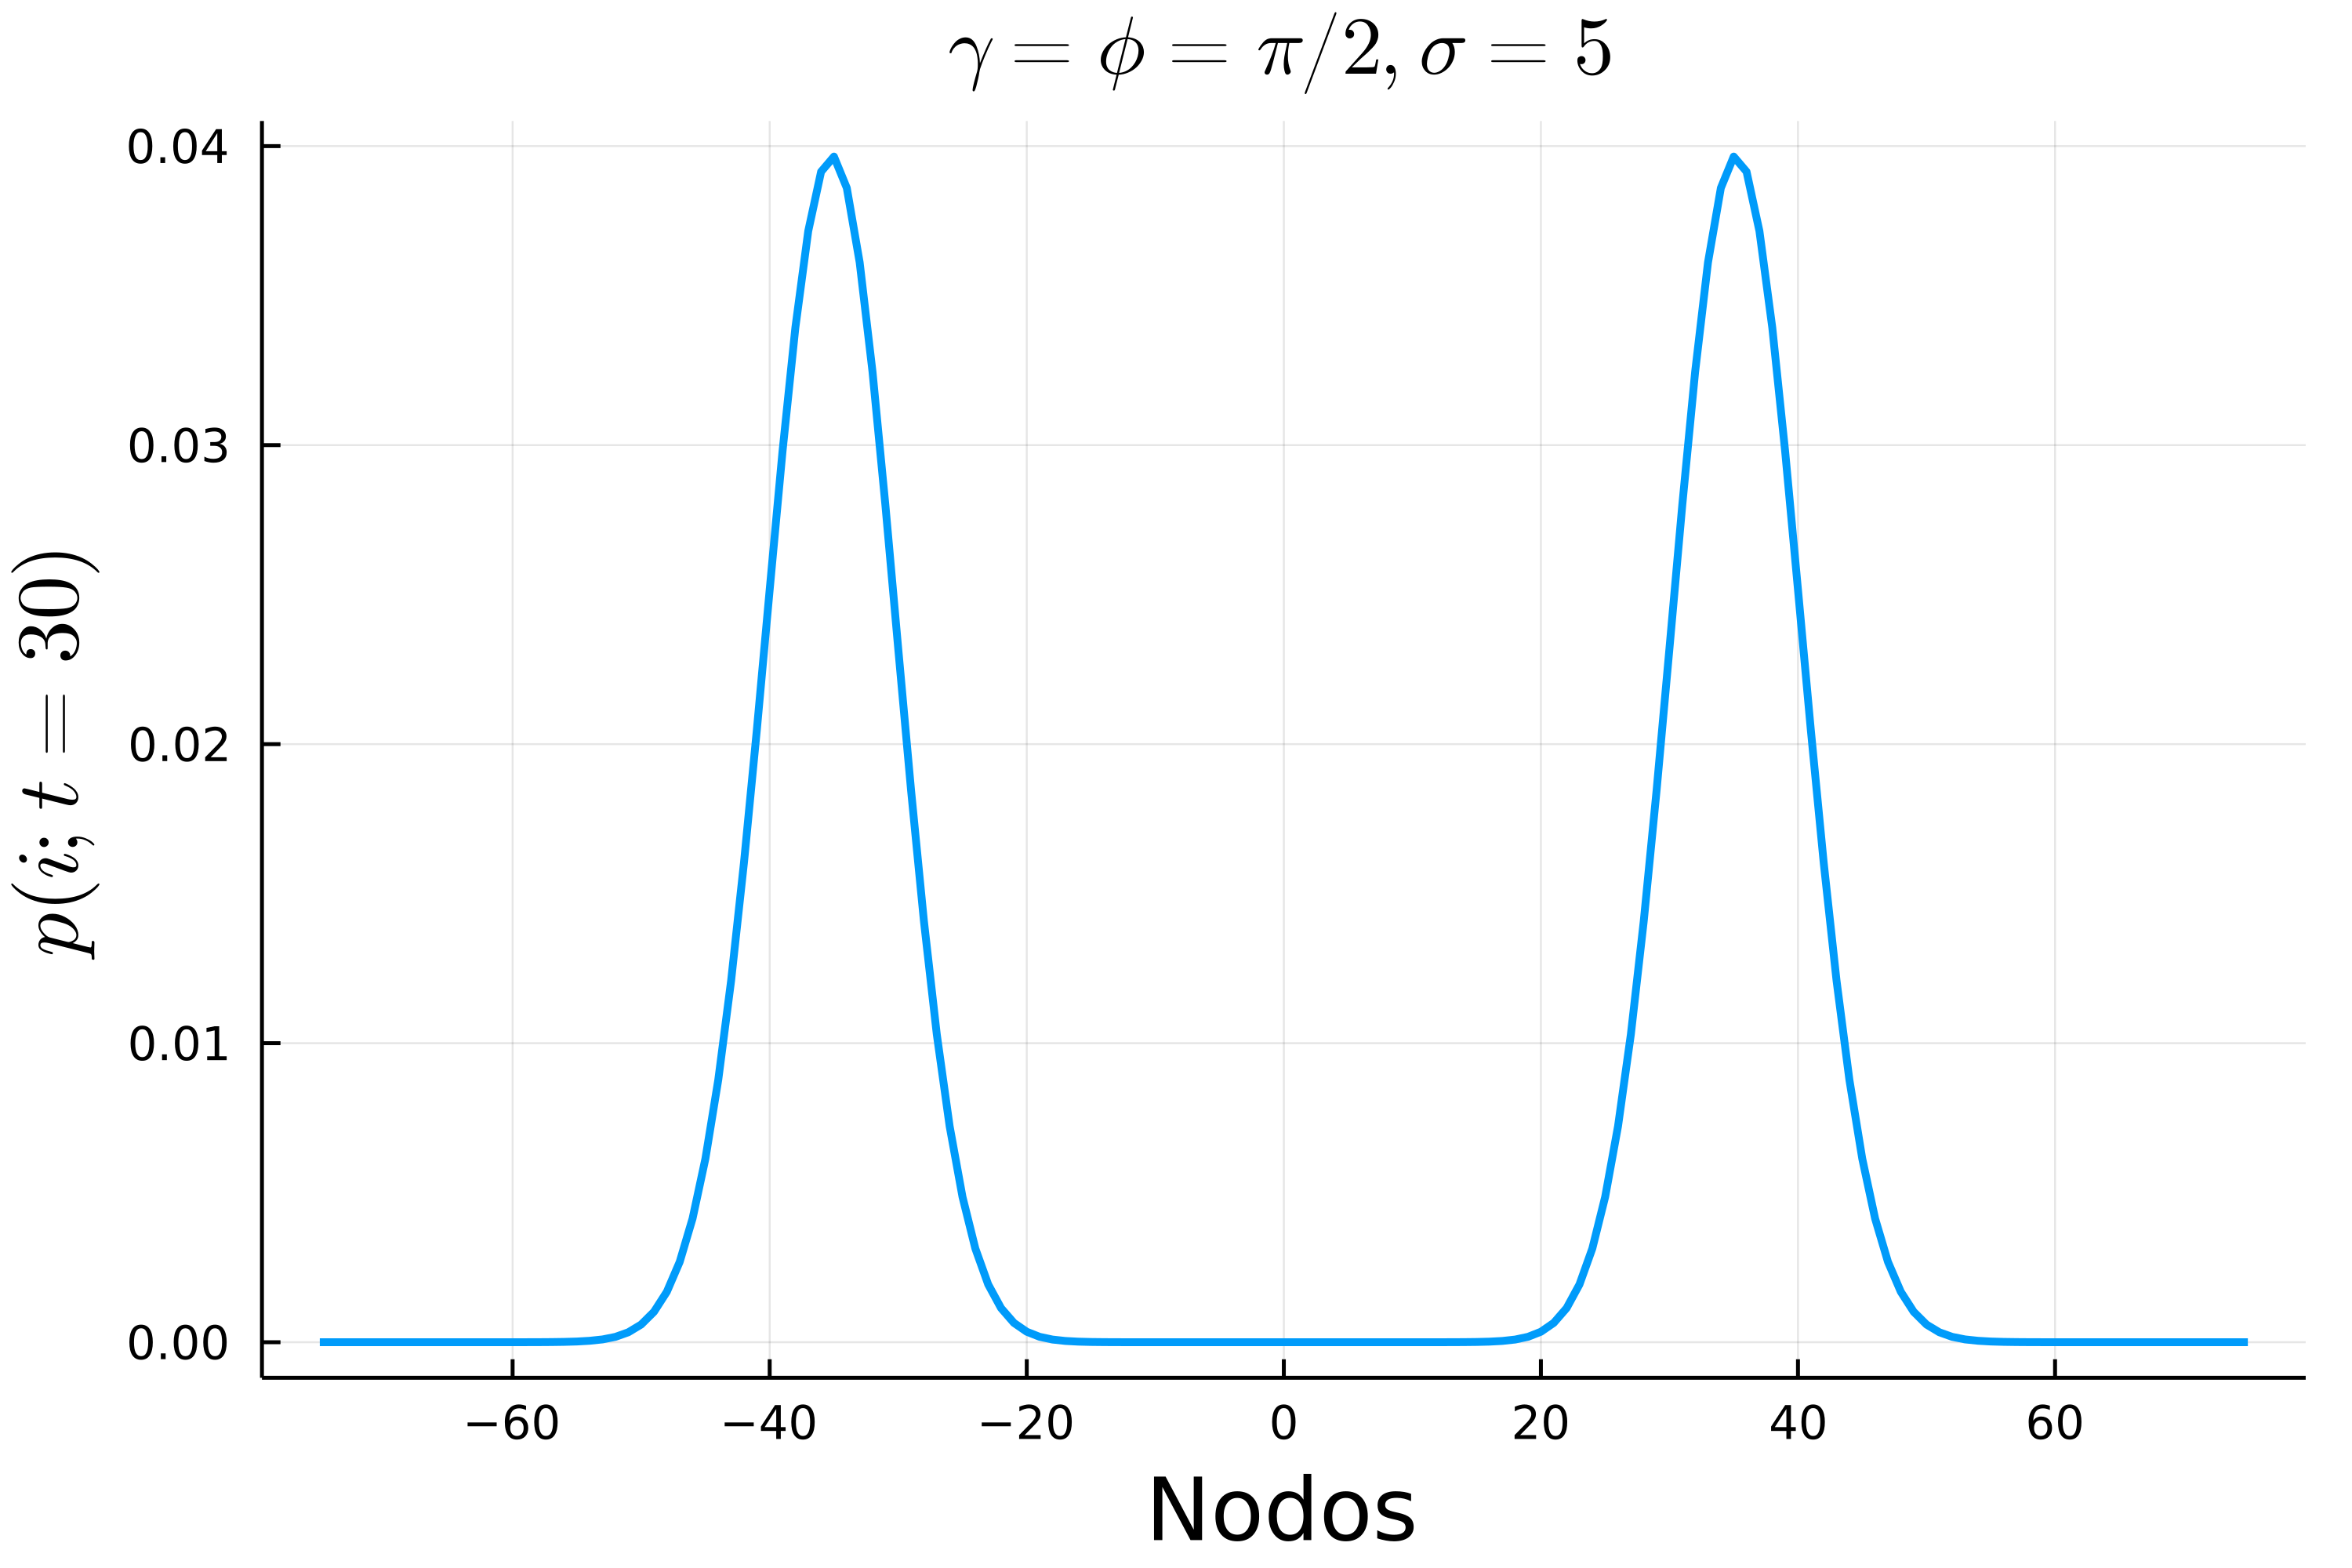

In [795]:
#bar(-Init:1:Init,norm.(G).^2)
# bar(-Init:1:Init,norm.(G).^2,title=L"\gamma=\phi=\pi/2,\sigma=5",
#     guidefont=fnt,ylabel=L"p(i;t=30"*L")",xlabel="Nodos",label=false)
plot(SpaceP,ProbaP,lw=2,title=L"\gamma=\phi=\pi/2,\sigma=5",
     guidefont=fnt,ylabel=L"p(i;t=30"*L")",xlabel="Nodos",label=false,fmt = :png, dpi=500)

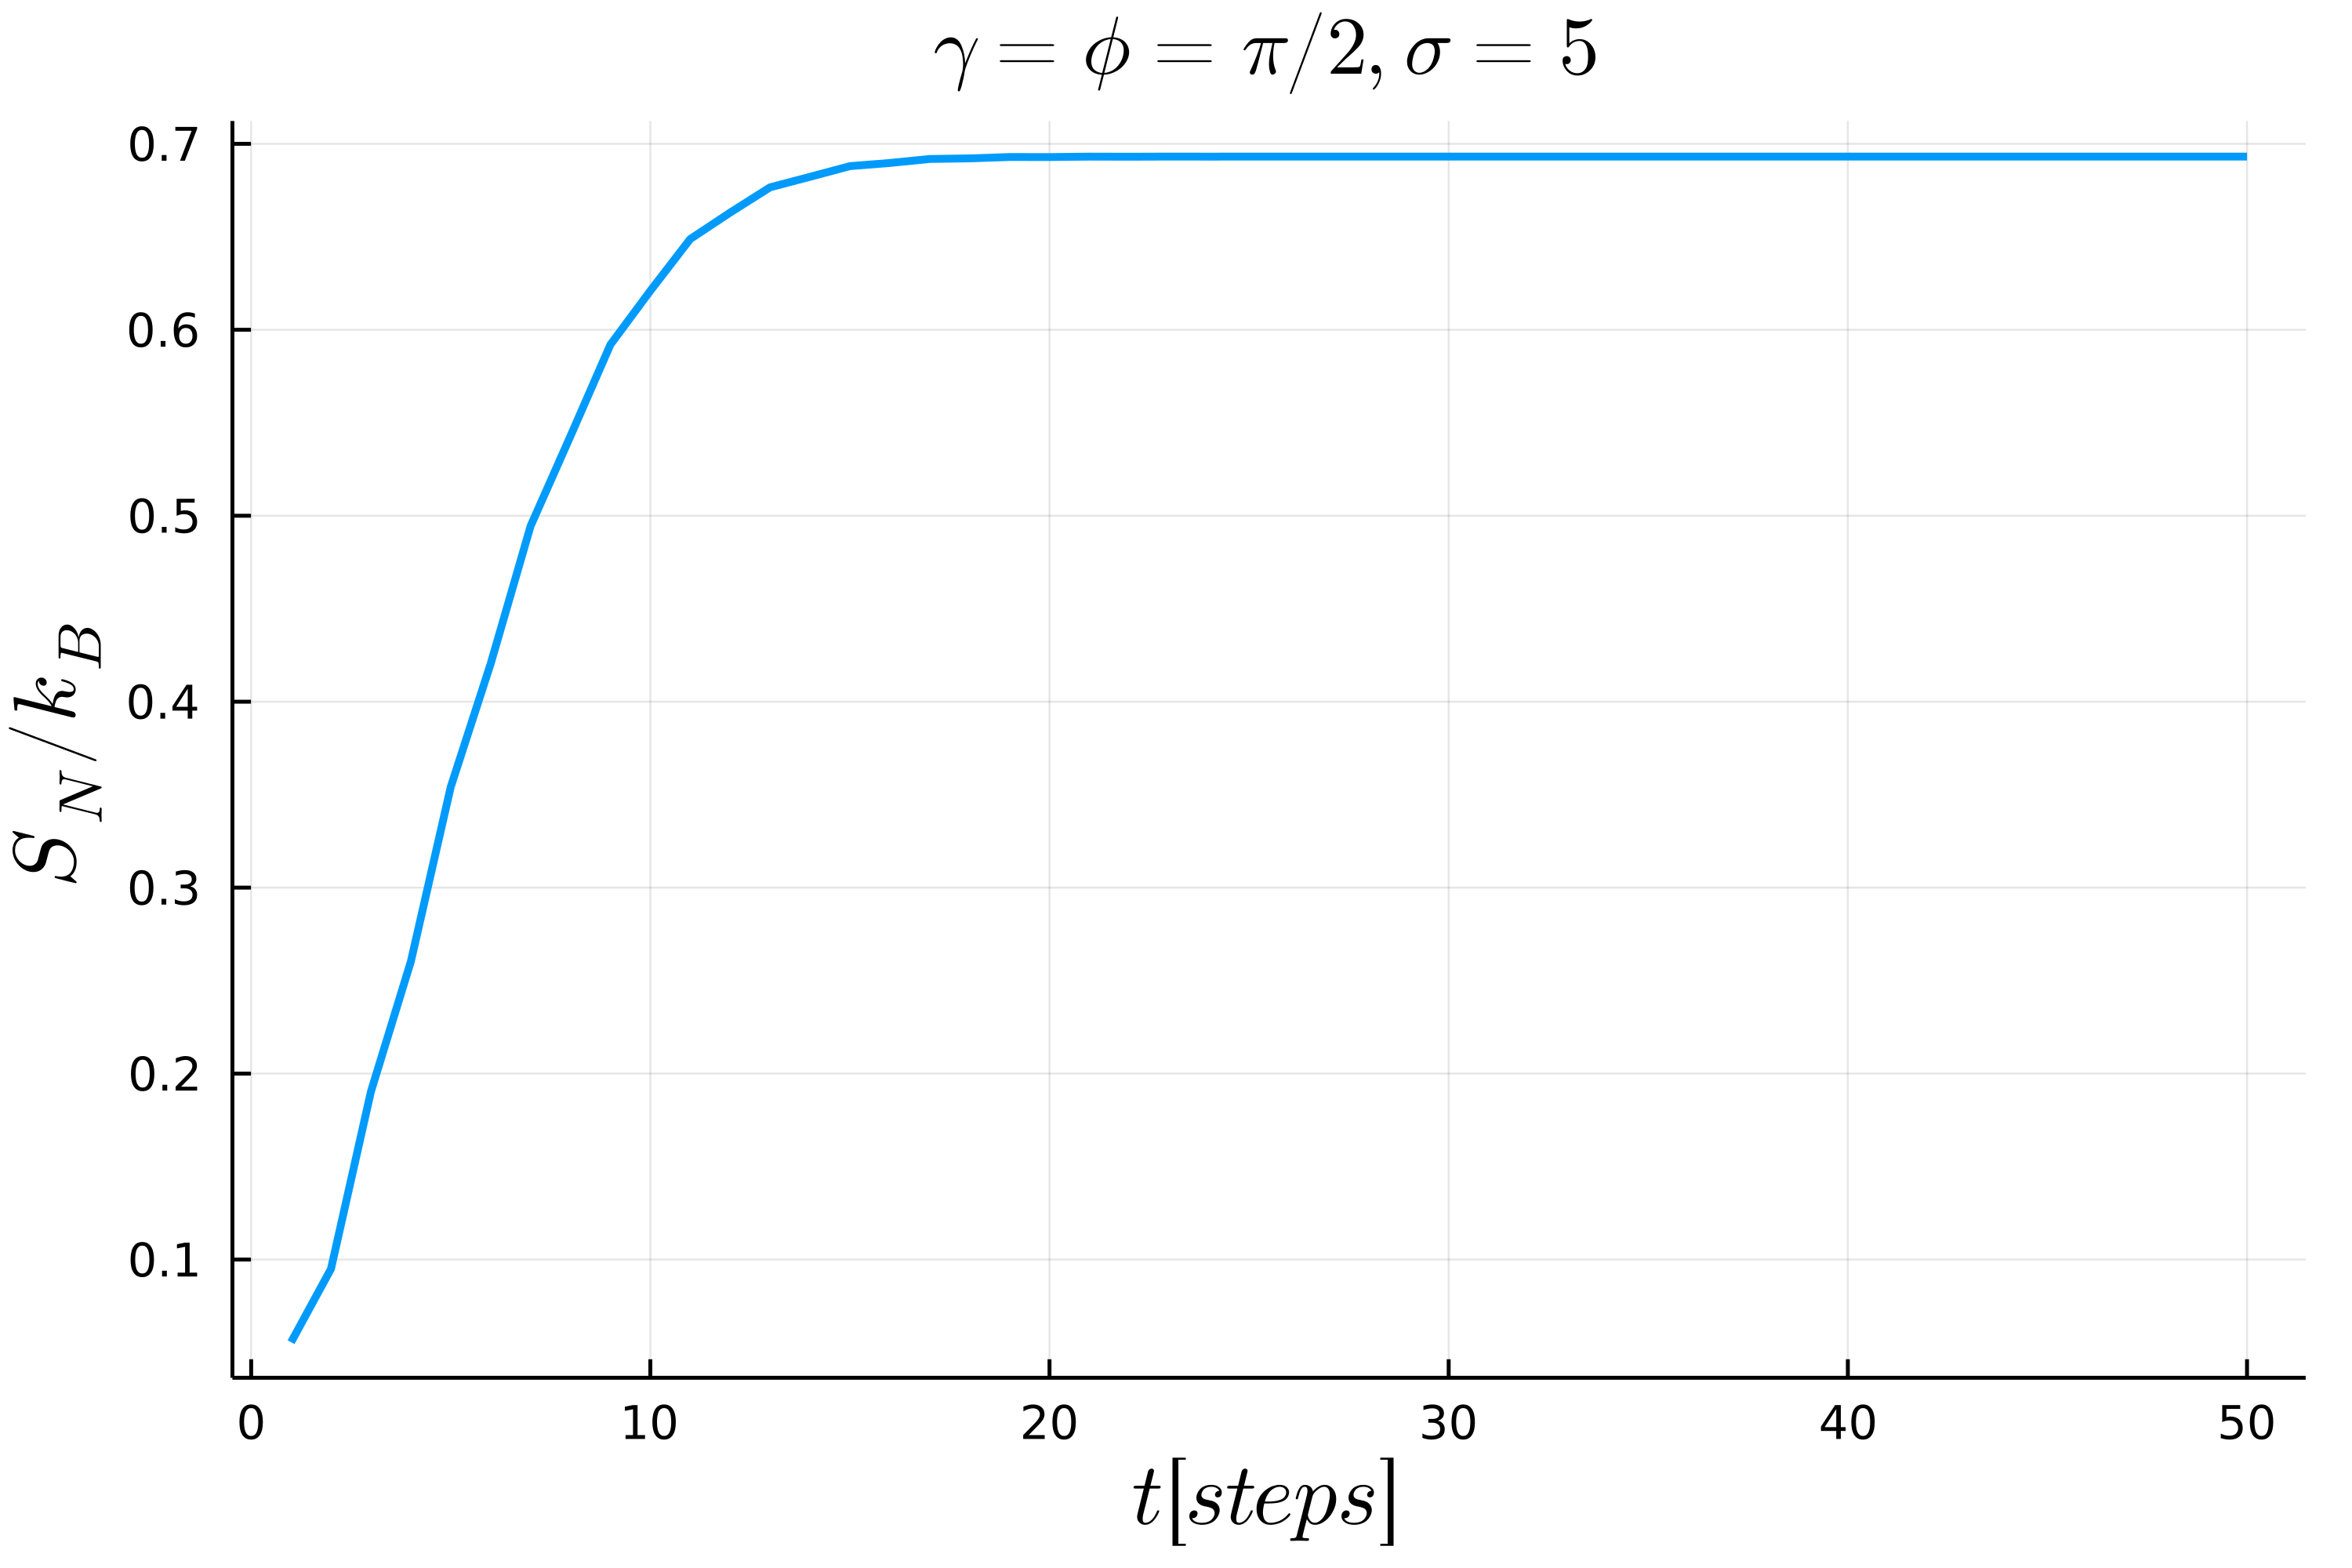

In [723]:
### Entropia Von Neuma
S=zeros(n)

for j=1:n
    G=QuanWal_1D_Gauss(j,H,sigm,gam,phi,F)
    Dst=zeros(ComplexF64,2,2)
    pos=length(G)
    for i=1:pos
        Dst[1,1]+=abs2(G[i][1])      ### corresponde a izq
        Dst[1,2]+=G[i][1]*conj(G[i][2])
        Dst[2,2]+=abs2(G[i][2])      ### correspondiende der
        Dst[2,1]+=conj(G[i][1])*G[i][2]
    end
    lamb=eigvals(Dst)
    S[j]=-(lamb[1]*log(lamb[1])+lamb[2]*log(lamb[2]))
end

plot(S,ylabel=L"S_N/k_B",xlabel=L"t[steps]",label=false,title=L"\gamma=\phi=\pi/2,\sigma=5",
    guidefont=fnt,legend=:bottomright,
    legendfontsize=12.0,lw = 2,fmt = :png, dpi=500
    #xlims=(400,900),ylims=(0.5,0.65)
    )

# VAriando Gamma

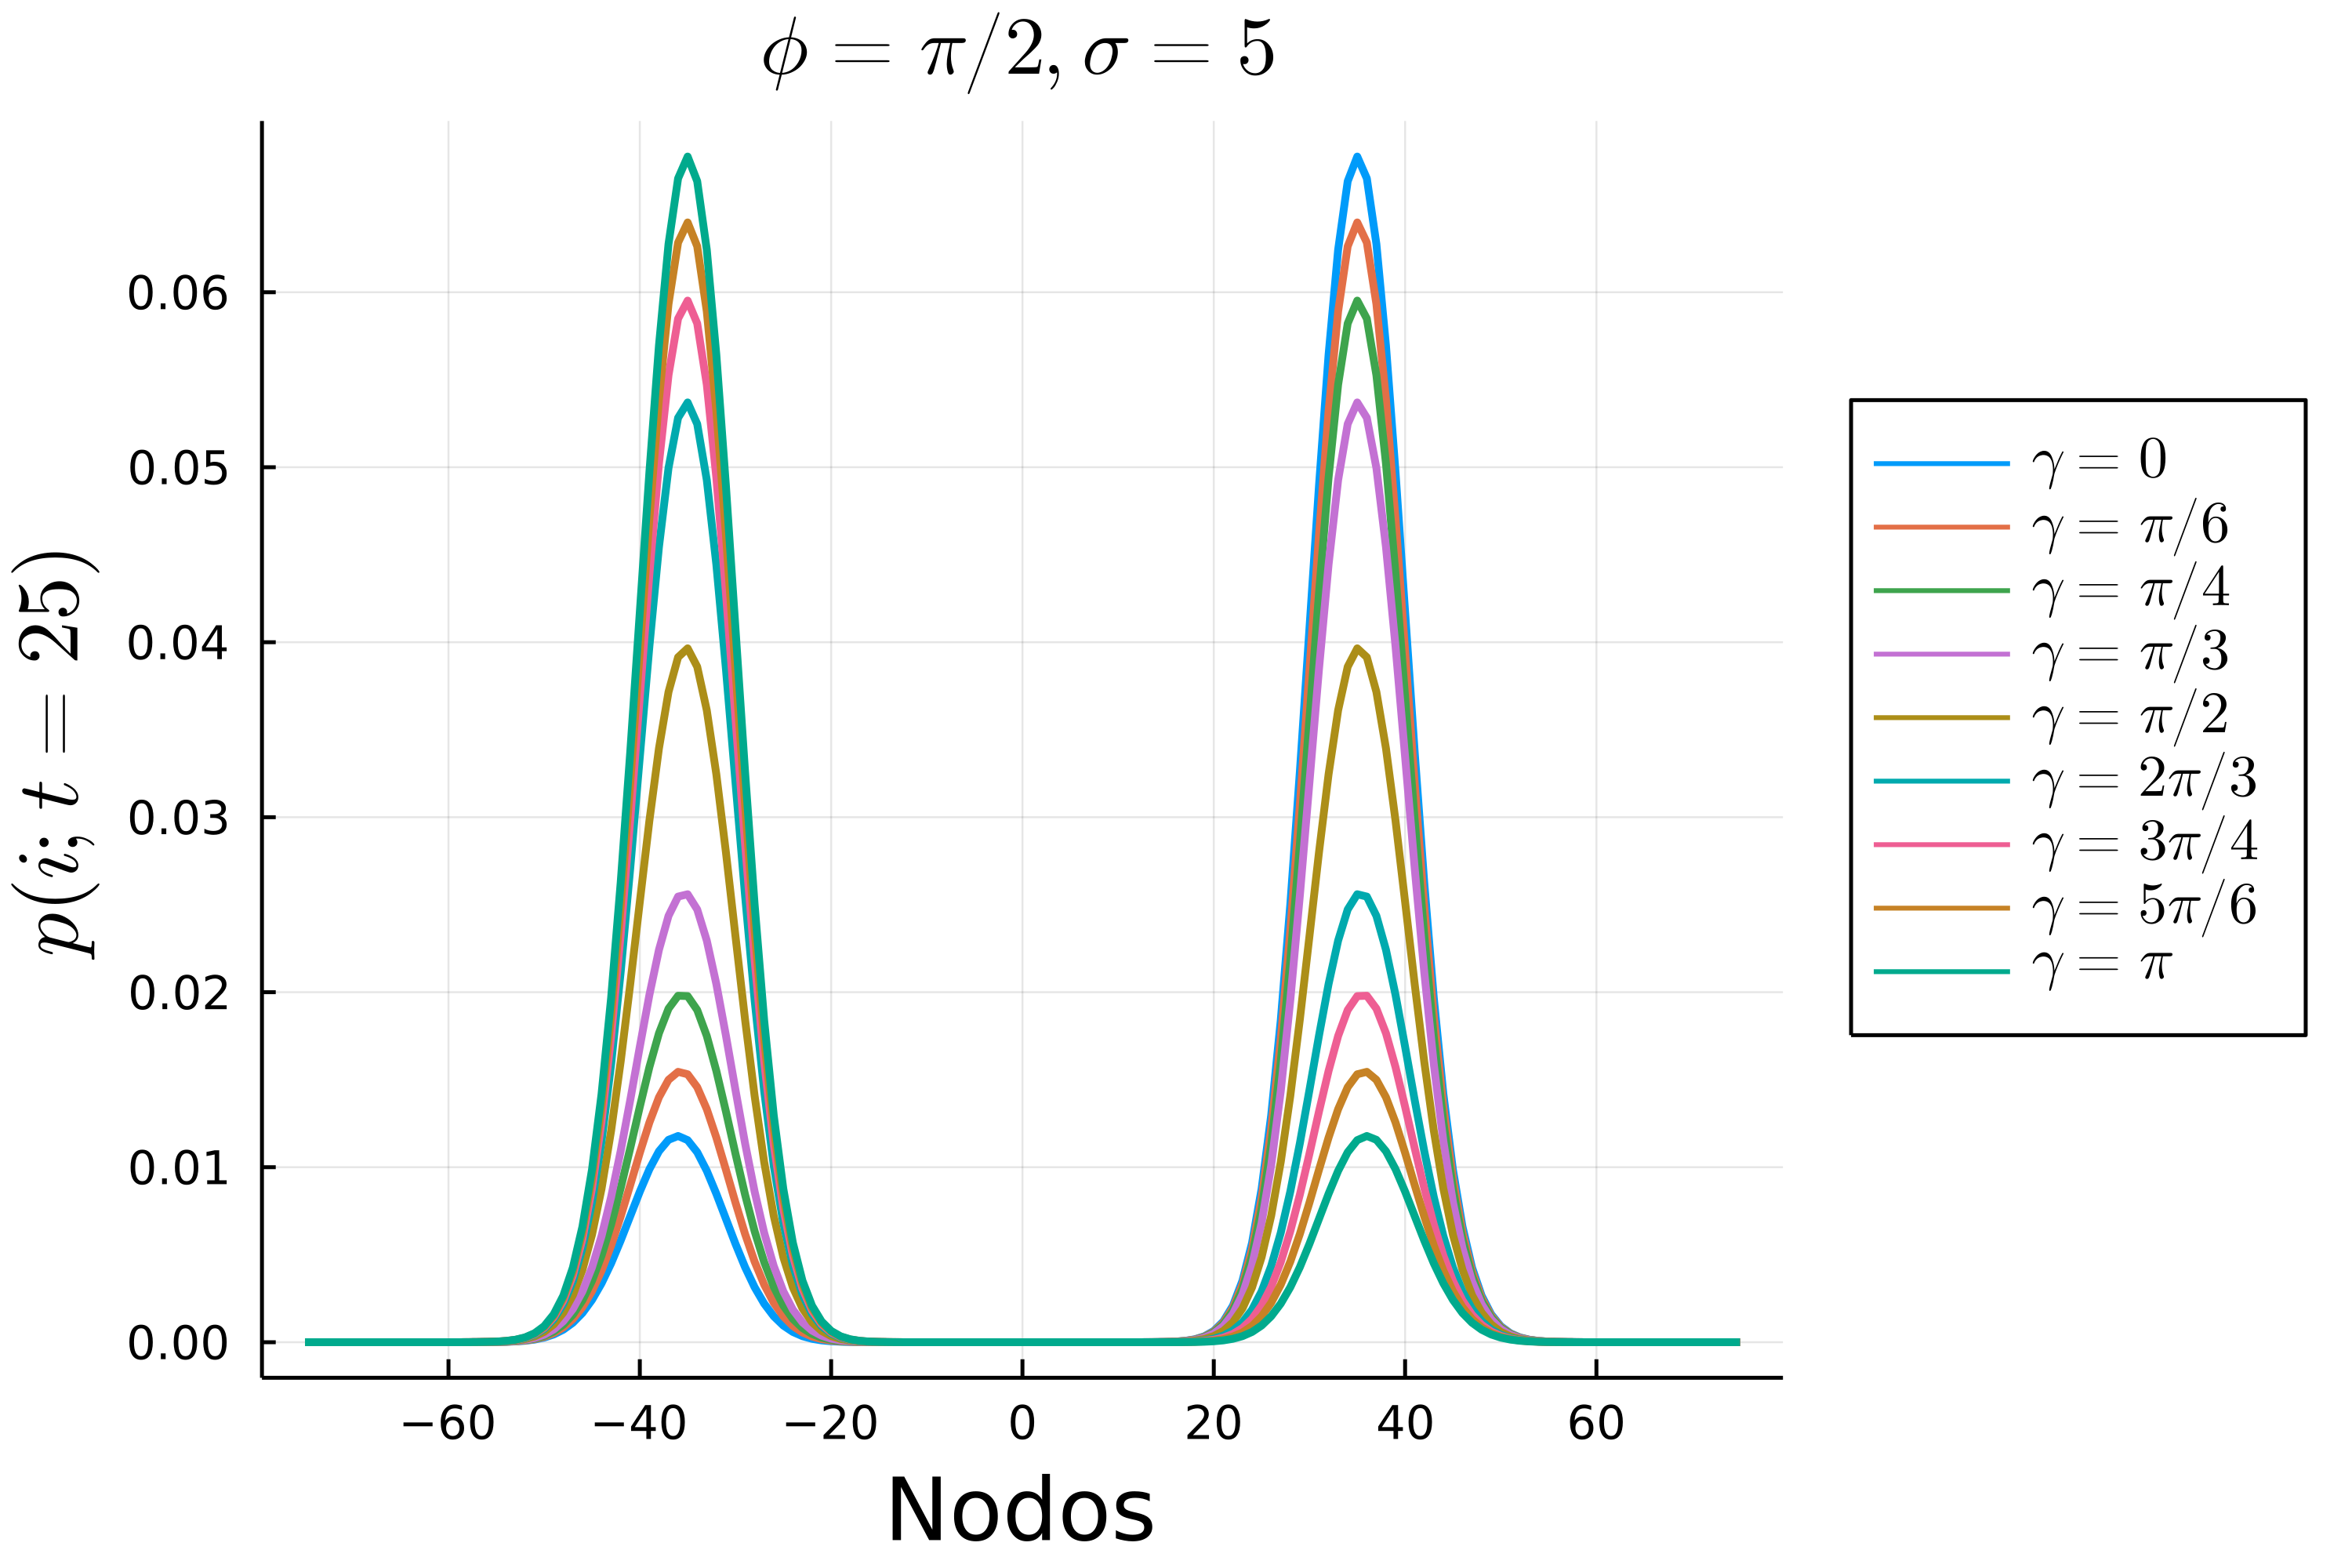

In [782]:

H=1/sqrt(2)*[1 1; 1 -1];
sigm=5
gam=π*[0,1/6,1/4,1/3,1/2,2/3,3/4,5/6,1]
phi=π*(1/2)
F=5

#SpaceP=zeros(length(gam),Numero_de_datos)
ProbaP=zeros(length(gam),Numero_de_datos)

for i=1:length(gam)
    G=QuanWal_1D_Gauss(n,H,sigm,gam[i],phi,F);
    #Space=-Init:1:Init
    Proba=norm.(G).^2
    for j=1:Numero_de_datos
        ProbaP[i,j]=Proba[j]
    end
end
plot(Space,ProbaP[1,:],lw=2,title=L"\phi=\pi/2, \sigma=5",legendfontsize=10.0,legend=:outerright
,guidefont=fnt,ylabel=L"p(i;t=25"*L")",xlabel="Nodos",label=L"\gamma=0",fmt = :png, dpi=500)
plot!(Space,ProbaP[2,:],lw=2,label=L"\gamma=\pi/6")
plot!(Space,ProbaP[3,:],lw=2,label=L"\gamma=\pi/4")
plot!(Space,ProbaP[4,:],lw=2,label=L"\gamma=\pi/3")
plot!(Space,ProbaP[5,:],lw=2,label=L"\gamma=\pi/2")
plot!(Space,ProbaP[6,:],lw=2,label=L"\gamma=2\pi/3")
plot!(Space,ProbaP[7,:],lw=2,label=L"\gamma=3\pi/4")
plot!(Space,ProbaP[8,:],lw=2,label=L"\gamma=5\pi/6")
plot!(Space,ProbaP[9,:],lw=2,label=L"\gamma=\pi")

In [783]:
#savefig("./Quantum_walker_Infinity_Chain_Gaussian_gamma.png")

In [784]:
### Entropia Von Neuma


SnP=zeros(length(gam),n)
for i=1:length(gam)
    for j=1:n
        G=QuanWal_1D_Gauss(j,H,sigm,gam[i],phi,F)
        Dst=zeros(ComplexF64,2,2)
        pos=length(G)
        for i=1:pos
            Dst[1,1]+=abs2(G[i][1])      ### corresponde a izq
            Dst[1,2]+=G[i][1]*conj(G[i][2])
            Dst[2,2]+=abs2(G[i][2])      ### correspondiende der
            Dst[2,1]+=conj(G[i][1])*G[i][2]
        end
        lamb=eigvals(Dst)
        SnP[i,j]=-(lamb[1]*log(lamb[1])+lamb[2]*log(lamb[2]))
    end
end

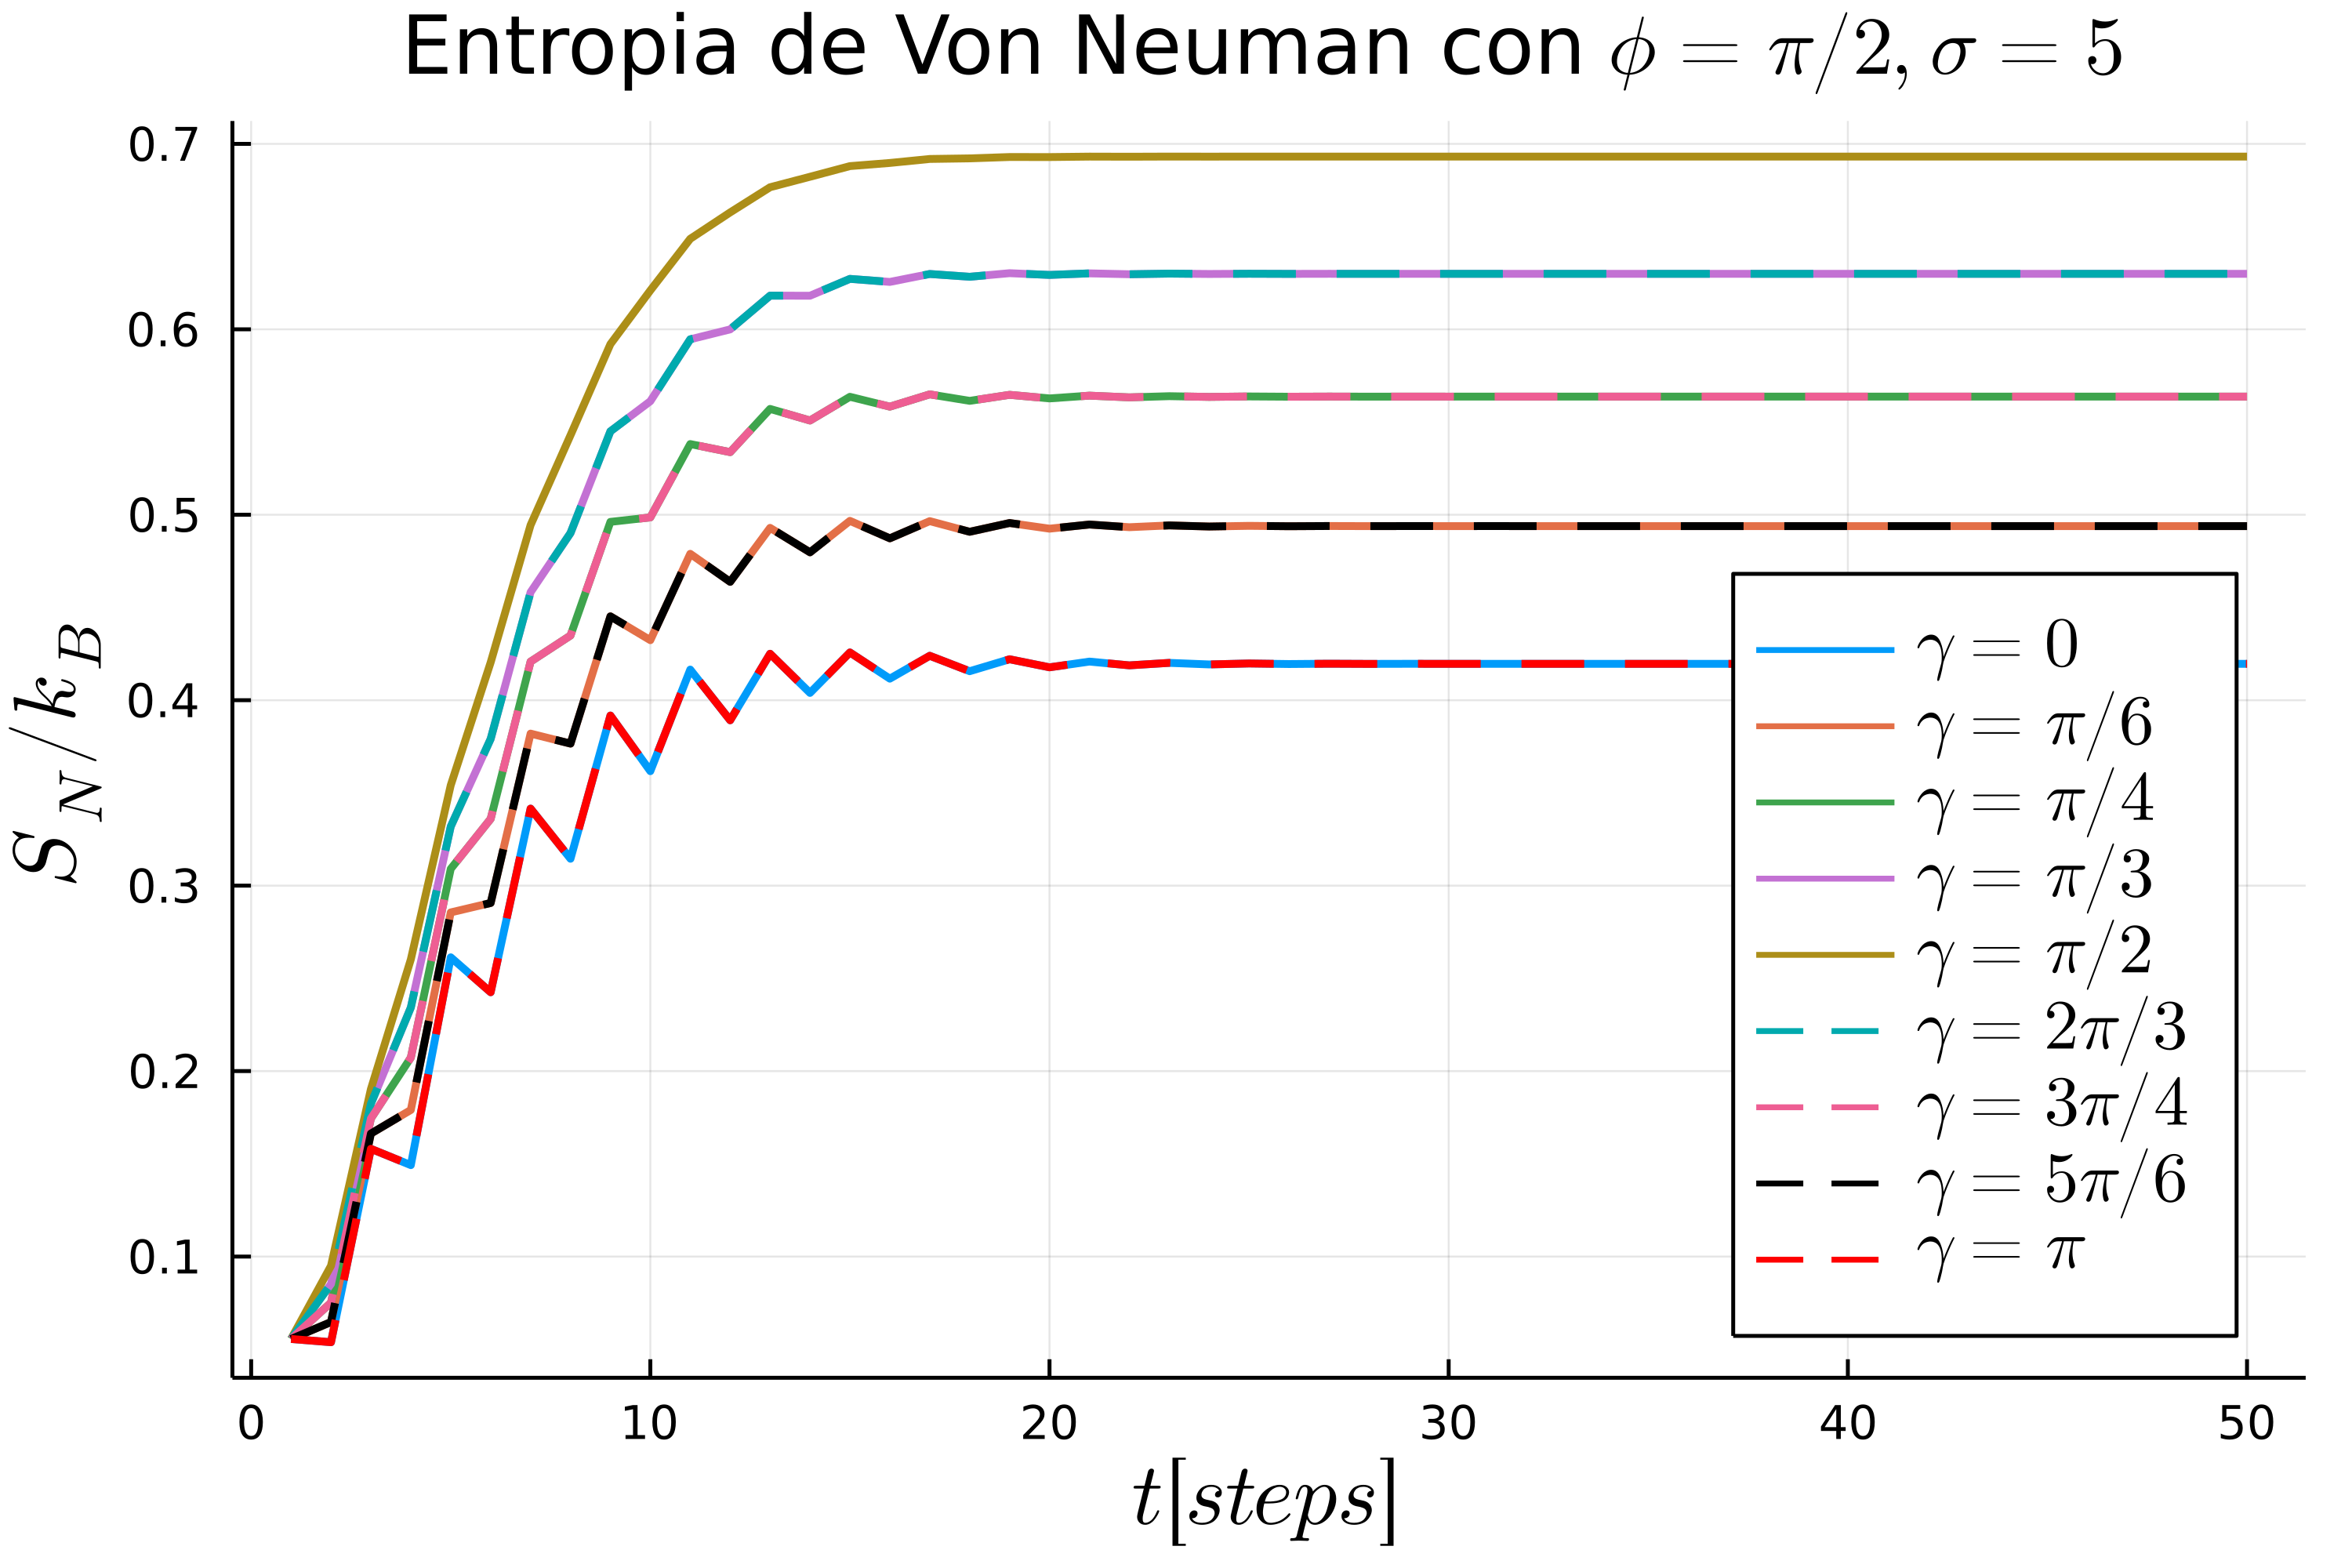

In [785]:
plot(SnP[1,:],ylabel=L"S_N/k_B",xlabel=L"t[steps]",label=L"\gamma=0",title="Entropia de Von Neuman con "*L"\phi=\pi/2, \sigma=5",
    guidefont=fnt,legend=:bottomright,legendfontsize=12.0,lw = 2,fmt = :png, dpi=500)
plot!(SnP[2,:],lw = 2,label=L"\gamma=\pi/6" )
plot!(SnP[3,:],lw = 2,label=L"\gamma=\pi/4" )
plot!(SnP[4,:],lw = 2,label=L"\gamma=\pi/3" )
plot!(SnP[5,:],lw = 2,label=L"\gamma=\pi/2" )
plot!(SnP[6,:],lw = 2,label=L"\gamma=2\pi/3" ,ls=:dash)
plot!(SnP[7,:],lw = 2,label=L"\gamma=3\pi/4" ,ls=:dash)
plot!(SnP[8,:],lw = 2,label=L"\gamma=5\pi/6",ls=:dash,color="black" )
plot!(SnP[9,:],lw = 2,label=L"\gamma=\pi",ls=:dash,color="red")

# Variando Phi

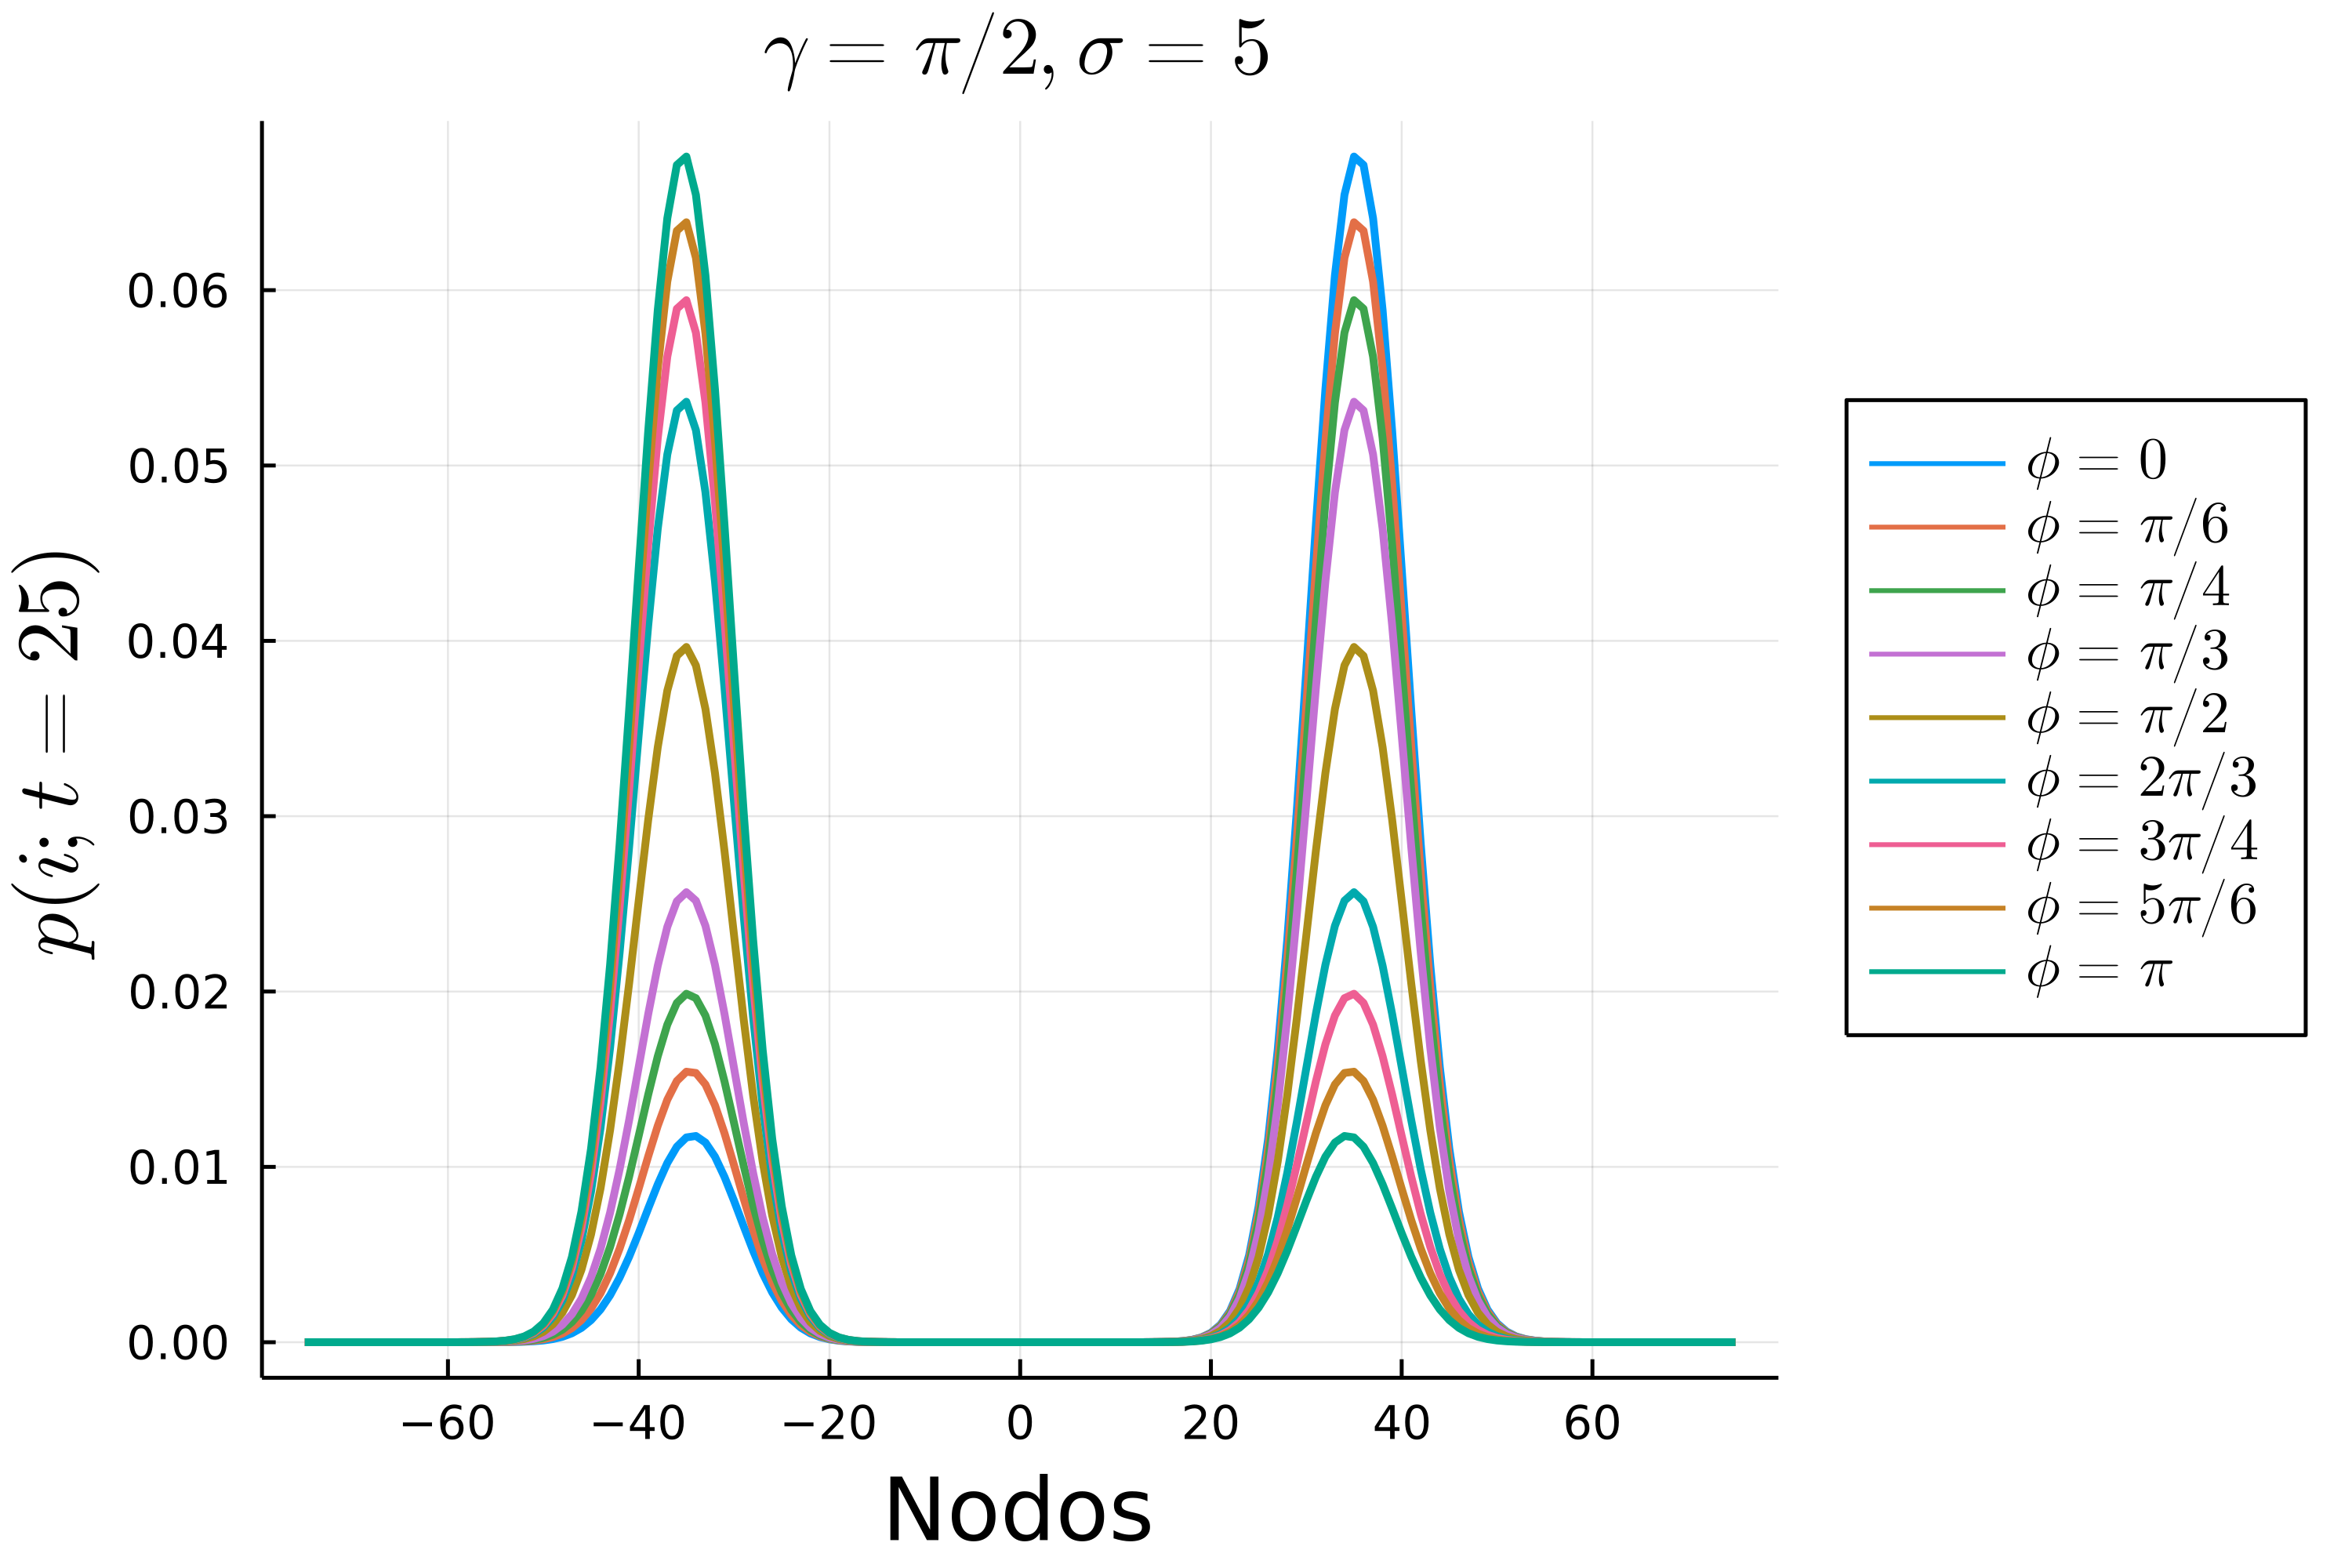

In [786]:


H=1/sqrt(2)*[1 1; 1 -1];
sigm=5
gam=π*(1/2)
phi=π*[0,1/6,1/4,1/3,1/2,2/3,3/4,5/6,1]
F=5

#SpaceP=zeros(length(gam),Numero_de_datos)
ProbaP=zeros(length(phi),Numero_de_datos)

for i=1:length(phi)
    G=QuanWal_1D_Gauss(n,H,sigm,gam,phi[i],F);
    #Space=-Init:1:Init
    Proba=norm.(G).^2
    for j=1:Numero_de_datos
        ProbaP[i,j]=Proba[j]
    end
end
plot(Space,ProbaP[1,:],lw=2,title=L"\gamma=\pi/2, \sigma=5",legendfontsize=10.0,legend=:outerright,
     guidefont=fnt,ylabel=L"p(i;t=25"*L")",xlabel="Nodos",label=L"\phi=0",fmt = :png, dpi=500)
plot!(Space,ProbaP[2,:],lw=2,guidefont=fnt,label=L"\phi=\pi/6")
plot!(Space,ProbaP[3,:],lw=2,guidefont=fnt,label=L"\phi=\pi/4")
plot!(Space,ProbaP[4,:],lw=2,guidefont=fnt,label=L"\phi=\pi/3")
plot!(Space,ProbaP[5,:],lw=2,guidefont=fnt,label=L"\phi=\pi/2")
plot!(Space,ProbaP[6,:],lw=2,guidefont=fnt,label=L"\phi=2\pi/3")
plot!(Space,ProbaP[7,:],lw=2,guidefont=fnt,label=L"\phi=3\pi/4")
plot!(Space,ProbaP[8,:],lw=2,guidefont=fnt,label=L"\phi=5\pi/6")
plot!(Space,ProbaP[9,:],lw=2,guidefont=fnt,label=L"\phi=\pi")

In [787]:
#savefig("./Quantum_walker_Infinity_Chain_Gaussian_phi.png")

In [788]:
### Entropia Von Neuma


SnP=zeros(length(phi),n)
for i=1:length(phi)
    for j=1:n
        G=QuanWal_1D_Gauss(j,H,sigm,gam,phi[i],F)
        Dst=zeros(ComplexF64,2,2)
        pos=length(G)
        for i=1:pos
            Dst[1,1]+=abs2(G[i][1])      ### corresponde a izq
            Dst[1,2]+=G[i][1]*conj(G[i][2])
            Dst[2,2]+=abs2(G[i][2])      ### correspondiende der
            Dst[2,1]+=conj(G[i][1])*G[i][2]
        end
        lamb=eigvals(Dst)
        SnP[i,j]=-(lamb[1]*log(lamb[1])+lamb[2]*log(lamb[2]))
    end
end

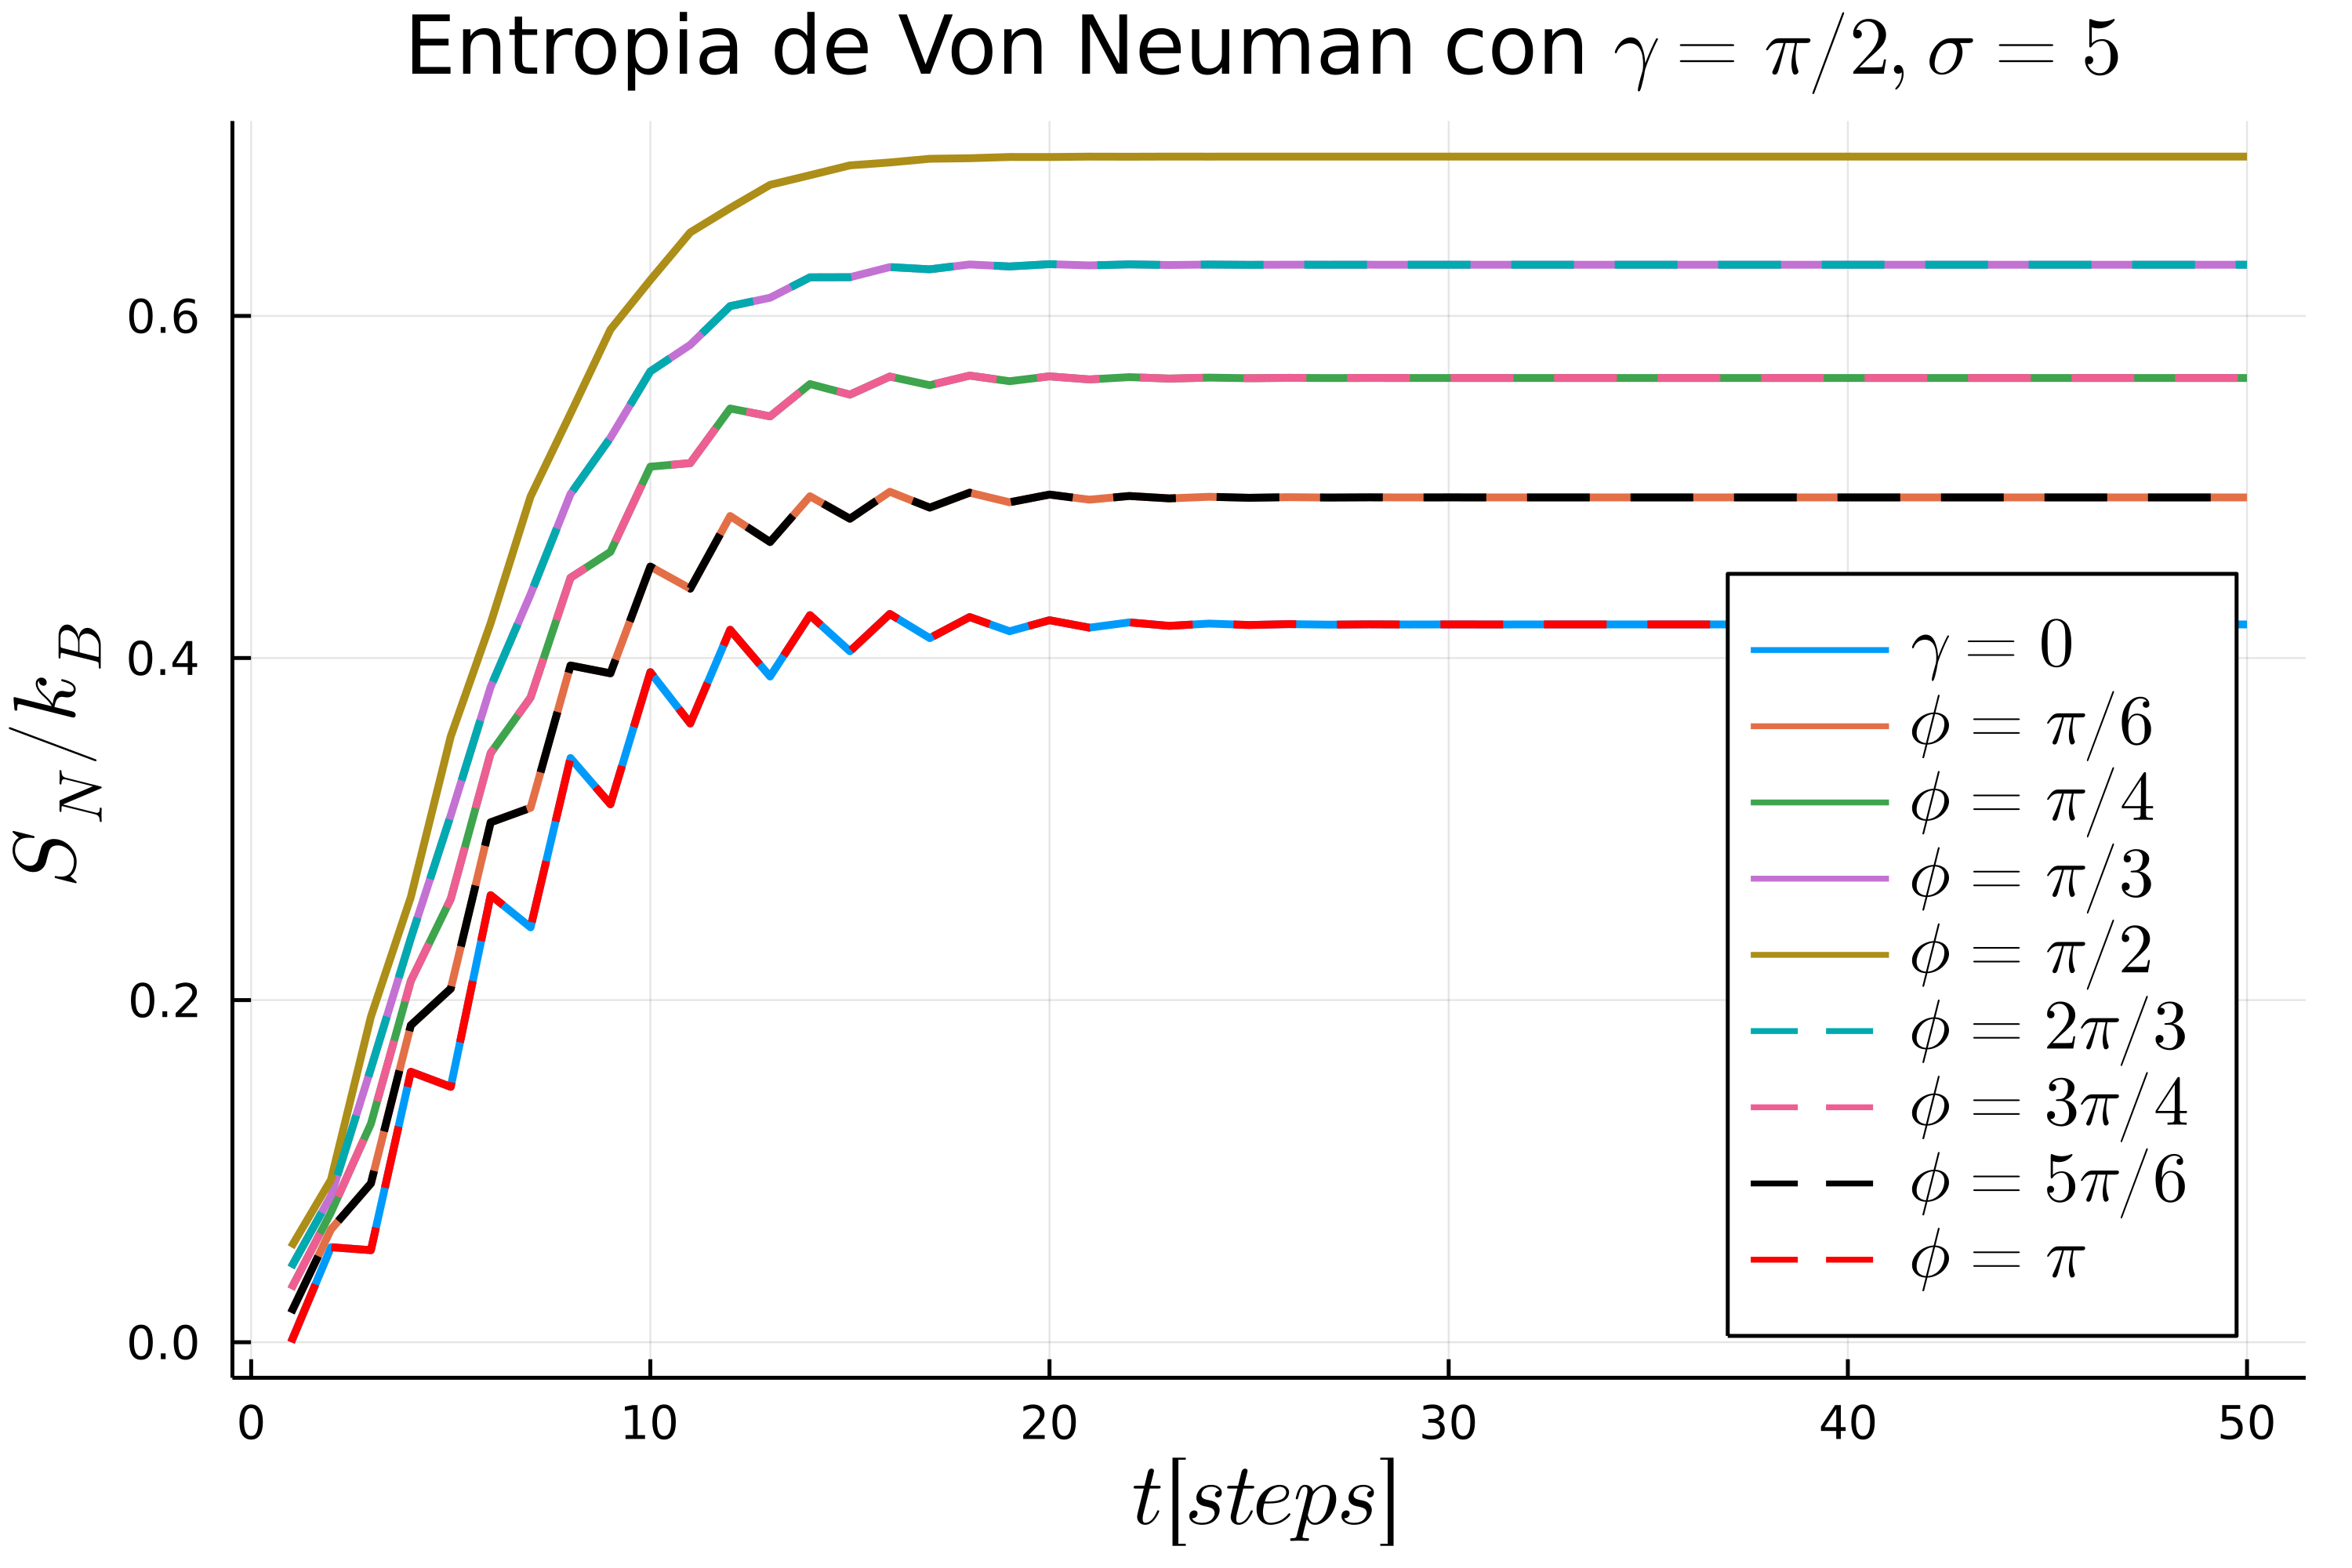

In [789]:
plot(SnP[1,:],ylabel=L"S_N/k_B",xlabel=L"t[steps]",label=L"\gamma=0",title="Entropia de Von Neuman con "*L"\gamma=\pi/2, \sigma=5",
    guidefont=fnt,legend=:bottomright,legendfontsize=12.0,lw = 2,fmt = :png, dpi=500)
plot!(SnP[2,:],lw = 2,label=L"\phi=\pi/6" )
plot!(SnP[3,:],lw = 2,label=L"\phi=\pi/4" )
plot!(SnP[4,:],lw = 2,label=L"\phi=\pi/3" )
plot!(SnP[5,:],lw = 2,label=L"\phi=\pi/2" )
plot!(SnP[6,:],lw = 2,label=L"\phi=2\pi/3" ,ls=:dash)
plot!(SnP[7,:],lw = 2,label=L"\phi=3\pi/4" ,ls=:dash)
plot!(SnP[8,:],lw = 2,label=L"\phi=5\pi/6",ls=:dash ,color="black")
plot!(SnP[9,:],lw = 2,label=L"\phi=\pi",ls=:dash,color="red")